In [1]:
import pandas as pd
import numpy as np
import os
import random
from numpy import linalg as LA
import matplotlib.pyplot as plt


'''Generate all Possible Set of Combination'''
def gen_r_a_graph(nodes,r):
    
    if ((nodes*r)%2)!=0:
        return 'error'
    if r > nodes:
        return 'error'
    
    graph_matrix=np.zeros([nodes,nodes])
    graph_dct={}
    for i in range(nodes):
        graph_dct[i]=set()
    
    while(if_equal(graph_dct,list(range(nodes)),r)!=True):

        for i in range(nodes):
            
            filled_elements=get_filled_elements(graph_dct,r)
            lst=list(range(nodes))
            lst.remove(i)
            
            
            for elmnt in filled_elements:
                try:
                    lst.remove(elmnt)
                except:
                    return('a')
                

        
        
            count=0
            #if (len(lst)<=abs(r-len(graph_dct[i]))):
            while True:
                count=count+1
                #print('list and size',lst,abs(r-len(graph_dct[i])))
                try:
                    sample_list=random.sample(lst,abs(r-len(graph_dct[i])))
                except:
                    return('a')
                    #gen_r_graph(nodes,r)
                if if_empty(graph_dct,sample_list,r)==True:
                    ch=sample_list
                    break
                else:
                    if count > 100:
                        break
                    else:
                        pass
            
            
            #print('sample_list',sample_list)
            if count > 100:
                return 'try different combination of nodes and degree'
            
            graph_dct[i].update(set(sample_list))
            for s in sample_list:
                graph_dct[s].update(set([i]))
            
            #print('dict',graph_dct)
            if if_equal(graph_dct,list(range(nodes)),r)==True:
                #print('below')
                return graph_dct

            

            
'''Check if the Dictionary is Fill or Not'''           
def get_filled_elements(dct,r):
    val_list=[]
    for key in dct.keys():
        if len(dct[key]) == r:
            val_list.append(key)
    return val_list

'''Check if the Dictionary is empty'''
def if_empty(dct,sample_list,r):
    
    for sample in sample_list:
        if len(dct[sample]) >= r:
            return False
    
    return True
      
    
def if_equal(dct,sample_list,r):
    
    for sample in sample_list:
        if len(dct[sample]) != r:
            return False
        
    return True


def create_r_graph(nodes,r):
    while True:
        dct=gen_r_a_graph(nodes,r)
        if dct!='a':
            break
    
    #build dictionary 
    
    graph_matrix=np.zeros([nodes,nodes])
    
    for i in range(nodes):
        
        col_indices=list(dct[i])
        for col in col_indices:
            graph_matrix[i,col]=1
    return graph_matrix,dct

def gen_laplacian(mat):
    lap_mat=np.zeros([mat.shape[0],mat.shape[0]])
    deg=np.sum(mat).values
    for i in range(mat.shape[0]):
        lap_mat[i,i]=deg[i]
    
    lap_mat=lap_mat-mat.values
    return lap_mat

'''Creare a p random Graph'''
def gen_p_graph(nodes,prob):
    if prob>1:
        er='error'
        return er
    graph_matrix=np.zeros([nodes,nodes])
    num_of_connections=int(((nodes * (nodes-1)) * prob  )/2)
    num_list_row=list(range(nodes-1))
    while(np.sum(np.triu(graph_matrix))!=num_of_connections):
            row_num=random.choice(num_list_row)
            num_list_col=(list(range(row_num+1,nodes)))
            col_num=random.choice(num_list_col)
            if graph_matrix[row_num,col_num]==0:
                graph_matrix[row_num,col_num]=1
                graph_matrix[col_num,row_num]=1
        
    #create dictionary
    df=pd.DataFrame(np.argwhere(graph_matrix==1))
    arr=np.unique(df.iloc[:,0])
    dct={}
    for i in range(graph_matrix.shape[0]):
        dct[str(i)]=set()
    for val in arr:
        dct[str(val)].update(df.loc[df.iloc[:,0]==val].iloc[:,1].values)
        
    return pd.DataFrame(graph_matrix),dct

'''La Placian Method'''
def laplacian_method(Adjacency):
    safe_margin = 1e-10
    Degree_matrix = gen_laplacian(Adjacency)
    L_matrix = Degree_matrix-np.matrix(Adjacency)
    eig_values = LA.linalg.eigvals(L_matrix)
    if np.partition(eig_values,2)[1]>0 and np.partition(eig_values,2)[1]>safe_margin:
        return 'Connected'
    else:
        return  'Dis Connected'

'''Power Method'''
def pow_method(mat):
    
    I=np.eye(mat.shape[0])
    a_mat=np.zeros([mat.shape[0],mat.shape[0]])
    for i in range(1,mat.shape[0]):
        a_mat=a_mat+gen_n_degree_mat(mat,i)
        
    result_mat=I+a_mat
    
    if (np.sum(result_mat>0)==np.square(result_mat.shape[0])):
        return 'Connected'
    else:
        return 'Dis connected'
        
    
def gen_n_degree_mat(mat,n):
    if n==1:
        return mat.values
    else:
        prod=mat
        for i in range(n-1):
            prod=np.dot(prod,mat)
        
    return prod

'''Breadth_First_Search'''
def bfs_connected_component(graph, start):
    explored = []
    queue = [start]
    while queue:
        node = queue.pop(0)
        if node not in explored:
            explored.append(node)
            neighbours = graph[str(node)]
            for neighbour in neighbours:
                queue.append(neighbour)
    return explored

'''Check if Graph is Connected or Not'''
def create_adj_list(graph):
    D = {}
    for item in graph.items():
        temp = []
        connected = list(item[1])
        key = item[0]
        for V in connected:
            temp.append(V)
        D[str(key)] = temp
    return D

def use_breadth(adj,n):
    for i in range(n):
        if len(bfs_connected_component(adj,i))==n:
            return 'Connected'
    return 'Dis Connected'

In [2]:
'''Create a random p-Er Graph and Use All three Algorithms to Check Connectivity'''
nodes = 100
Adjacency,dictionary = gen_p_graph(nodes,0.30)
method1 = pow_method(Adjacency)
method2 = laplacian_method(Adjacency)
method3 = use_breadth(create_adj_list(dictionary),nodes)
method1,method2,method3

('Connected', 'Connected', 'Connected')

In [3]:
'''Create a Random r Graph and Use all three mtethods to check the Connectivity'''
r_graph,dic = create_r_graph(50,12)
pow_method(pd.DataFrame(r_graph)),laplacian_method(pd.DataFrame(r_graph)),use_breadth(create_adj_list(dic),50)

('Connected', 'Connected', 'Connected')

In [4]:
'''Time Comparison for p-Er graph'''
print ('Time Taken for Power Method')
%timeit pow_method(Adjacency)
print ('Time Taken for La Placian Method')
%timeit laplacian_method(Adjacency)
print ('Time Taken Using BFS')
%timeit use_breadth(create_adj_list(dictionary),nodes)

Time Taken for Power Method
1 loop, best of 3: 370 ms per loop
Time Taken for La Placian Method
100 loops, best of 3: 3.29 ms per loop
Time Taken Using BFS
100 loops, best of 3: 5.08 ms per loop


In [5]:
'''Time Comparison for r-regular graph'''
print ('Time Taken for Power Method')
%timeit pow_method(pd.DataFrame(r_graph))
print ('Time Taken for La Placian Method')
%timeit laplacian_method(pd.DataFrame(r_graph))
print ('Time Taken Using BFS')
%timeit use_breadth(create_adj_list(dic),50)

Time Taken for Power Method
10 loops, best of 3: 52.8 ms per loop
Time Taken for La Placian Method
1000 loops, best of 3: 844 µs per loop
Time Taken Using BFS
1000 loops, best of 3: 562 µs per loop


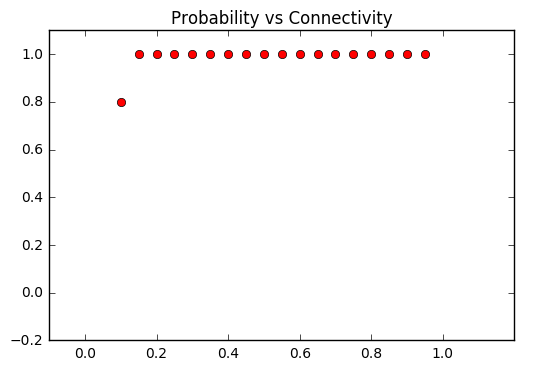

In [6]:
'''p-Er Graph of Connectivity as a Function of Probability'''
n = 100
P = np.arange(0.1,1,0.05)
ratios = []
for i in range(len(P)):
    con=0
    for j in range(5):
        adj = gen_p_graph(n,P[i])[0]
        if pow_method(adj)=='Connected':
            con+=1
    ratios.append(con/5)
plt.plot(P,ratios,'ro')
plt.axis([-0.1,1.2,-0.2,1.1])
plt.title('Probability vs Connectivity')
plt.show()

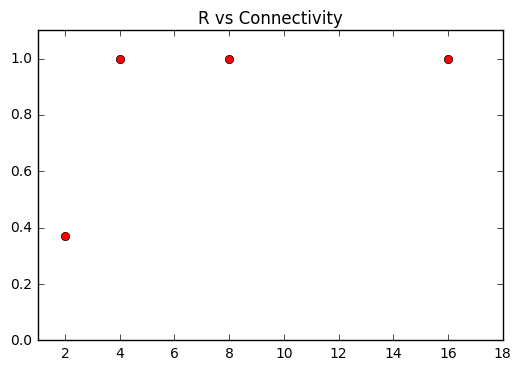

In [29]:
'''r-regular Graph of Connectivity as a Function of Cordinality'''
n = 20
r = [2,4,8,16]
ratios = []
for i in range(len(r)):
    con=0
    for j in range(100):
        adj = create_r_graph(n,r[i])[0]
        if pow_method(pd.DataFrame(adj))=='Connected':
            con+=1
    ratios.append(con/100)
plt.plot(r,ratios,'ro')
plt.axis([1,18,0,1.1])
plt.title('R vs Connectivity')
plt.show()